# Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Data Analysis Materials\Elevoo\Task 1\train.csv")

## Explore Dataset

In [3]:
data.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print (data.shape) 
data.info() 

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.Handle Missing

In [6]:
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)

In [7]:
data ["Embarked"] = data ["Embarked"].fillna(data["Embarked"].mode())

In [8]:
data['Hndle_Cabin'] = data['Cabin'].notnull().astype(int)
data.drop('Cabin', axis=1, inplace=True)

In [9]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Hndle_Cabin    0
dtype: int64

## 2.Handle Data Types

In [10]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Hndle_Cabin  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [11]:
data["Embarked"] = data["Embarked"].astype("category")
data["Pclass"] = data["Pclass"].astype("category")
data["Sex"] = data["Sex"].astype("category")

## Check Statis


In [12]:
data.describe() # Get descriptive statistics for all columns

,PassengerId,Survived,Age,SibSp,Parch,Fare,Hndle_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [13]:
data.groupby('Pclass', observed=False)['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
data.groupby('Sex' , observed=False)['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [15]:
pd.crosstab(data['Sex'], data['Pclass'], values = data['Survived'], aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Data Visualisation

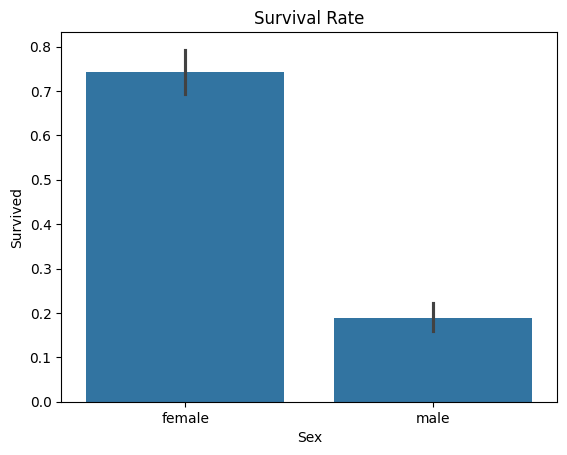

In [16]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate')
plt.show()

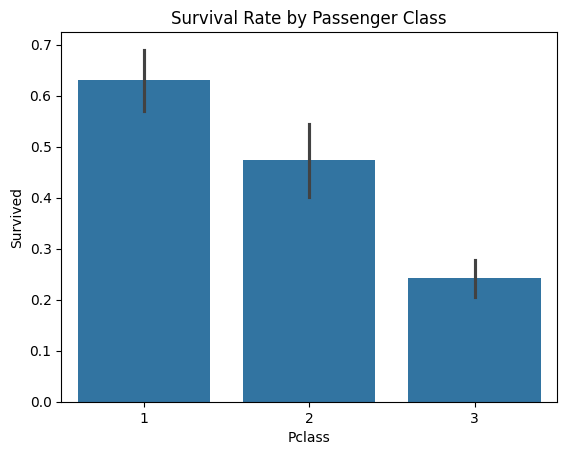

In [17]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

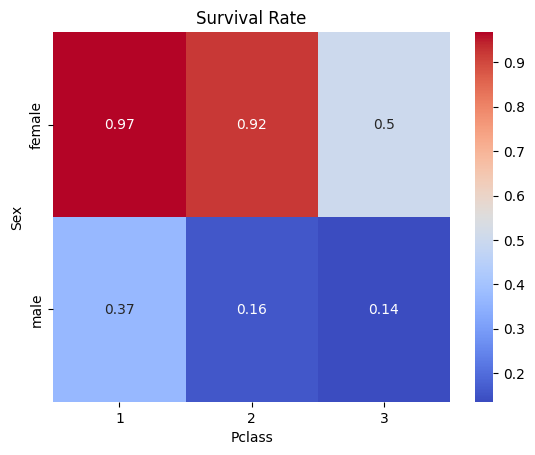

In [18]:
Correlation = pd.crosstab(data["Sex"], data["Pclass"], values=data["Survived"], aggfunc='mean')
sns.heatmap(Correlation, annot=True, cmap='coolwarm')
plt.title('Survival Rate')
plt.show()

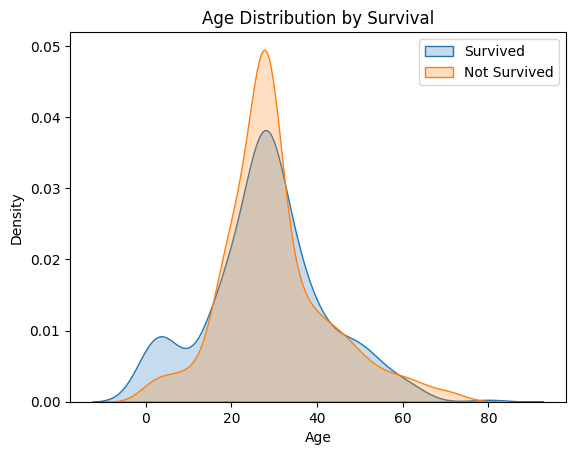

In [19]:
sns.kdeplot(data[data['Survived'] == 1]['Age'], fill=True, label="Survived")
sns.kdeplot(data[data['Survived'] == 0]['Age'], fill=True, label="Not Survived")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()